<h1>Convolutional Neural Network -MNIST </h1>

In [5]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

In [8]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

<h2> Model 1 </h2>

In [11]:
#Initialising Layers
model = Sequential()

#Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))
#Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_normal'))
#Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout
model.add(Dropout(0.5))
#Flatten
model.add(Flatten())
#Hidden Layer
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
#Dropout
model.add(Dropout(0.5))
#Output Layer
model.add(Dense(num_classes, activation=tf.nn.softmax,kernel_initializer='glorot_normal'))


In [12]:
#Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [13]:
#Compiling
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

his=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 393us/step - loss: 0.2661 - acc: 0.9199 - val_loss: 0.0593 - val_acc: 0.9821
Epoch 2/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0958 - acc: 0.9722 - val_loss: 0.0396 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0721 - acc: 0.9783 - val_loss: 0.0358 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 20s 328us/step - loss: 0.0580 - acc: 0.9828 - val_loss: 0.0369 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 20s 326us/step - loss: 0.0504 - acc: 0.9855 - val_loss: 0.0309 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0483 - acc: 0.9854 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0435 - acc: 0.9869 - val_loss: 0.

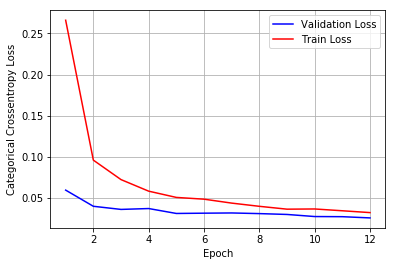

In [14]:
#Plotting the the train and test loss for each epochs

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

In [15]:
#Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0254629711212
Test accuracy: 0.9914


<h2> Model 2</h2>

In [16]:
#Initialising Layers
model2 = Sequential()

#Convolutional Layer
model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))
#Convolutional Layer
model2.add(Conv2D(128, (5, 5), activation='relu',kernel_initializer='he_normal'))
#Maxpooling
model2.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout
model2.add(Dropout(0.5))
#Flatten
model2.add(Flatten())
#Hidden Layer
model2.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
#Batch Normalization
model2.add(BatchNormalization())
#Dropout
model2.add(Dropout(0.5))
#Output Layer
model2.add(Dense(num_classes, activation=tf.nn.softmax,kernel_initializer='glorot_normal'))


In [17]:
#Model Summary
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3965184   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
__________

In [18]:
#Compiling
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

his=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 374us/step - loss: 0.1595 - acc: 0.9516 - val_loss: 0.0394 - val_acc: 0.9860
Epoch 2/12
60000/60000 [==============================] - 21s 347us/step - loss: 0.0647 - acc: 0.9803 - val_loss: 0.0358 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 21s 348us/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.0287 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 21s 348us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.0252 - val_acc: 0.9914
Epoch 5/12
60000/60000 [==============================] - 21s 346us/step - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0221 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 21s 347us/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0240 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 21s 347us/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.

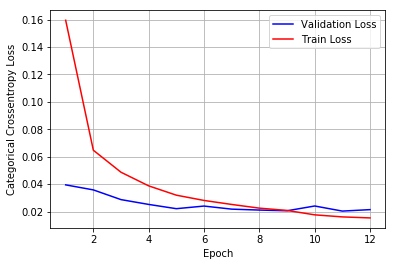

In [19]:
#Plotting the the train and test loss for each epochs

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

In [20]:
#Test loss and Accuracy
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0213812677467
Test accuracy: 0.9931


<h2> Model 3 </h2>

In [21]:
#Initialising Layers
model3 = Sequential()

#Convolutional Layer
model3.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_initializer='he_normal'))
#Convolutional Layer
model3.add(Conv2D(128, (7, 7), activation='relu',kernel_initializer='he_normal'))
#Maxpooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout
model3.add(Dropout(0.5))
#Flatten
model3.add(Flatten())
#Hidden Layer
model3.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
#Batch Normalization
model3.add(BatchNormalization())
#Dropout
model3.add(Dropout(0.5))
#Hidden Layer 
model3.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
#Batch Normalization
model3.add(BatchNormalization())
#Dropout
model3.add(Dropout(0.5))
#Output Layer
model3.add(Dense(num_classes, activation=tf.nn.softmax,kernel_initializer='glorot_normal'))


In [22]:
#Model summary
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 128)       401536    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2654464   
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

In [23]:
#Compiling
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

his=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 361us/step - loss: 0.2565 - acc: 0.9238 - val_loss: 0.0465 - val_acc: 0.9844
Epoch 2/12
60000/60000 [==============================] - 20s 325us/step - loss: 0.0817 - acc: 0.9766 - val_loss: 0.0399 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0614 - acc: 0.9821 - val_loss: 0.0250 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0479 - acc: 0.9853 - val_loss: 0.0268 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 20s 326us/step - loss: 0.0394 - acc: 0.9881 - val_loss: 0.0255 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 19s 324us/step - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 7/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0309 - acc: 0.9906 - val_loss: 0.

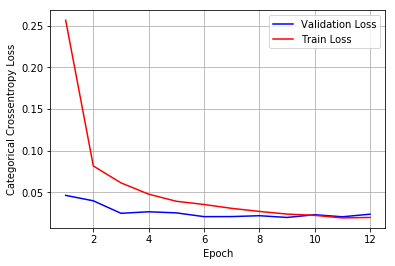

In [24]:
#Plotting the train and test error for each epochs
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = his.history['val_loss']
ty = his.history['loss']
plt_dynamic(x, vy, ty, ax)

In [25]:
#Test loss and Accuracy
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0239041307543
Test accuracy: 0.9935


<h2> Conclusion : </h2>

<table style="width:100%">
  <tr>
    <th>Model</th>  
    <th>Training Accuracy</th>
    <th>Test Accuracy </th> 
    <th>Train Loss</th>
    <th>Test loss</th>
  </tr>
  <tr>
    <td>1</td>  
    <td>99.07</td>
    <td>99.14</td> 
    <td>0.0319</td>
    <td>0.0255</td> 
  </tr>
  <tr>
    <td>2 </td>  
    <td>99.49</td>
    <td>99.31</td> 
    <td>0.0153</td>
    <td>0.0214</td> 
  </tr>
  <tr>
    <td>3</td>  
    <td>99.38</td>
    <td>99.35</td> 
    <td>0.0200</td>
    <td>0.0239</td> 
  </tr>
</table>